# Ferromagnetic Hysterisis 
PHYS250 Alastair McLean

This Python Notebook allows you to calculate the area enclosed by the B-H curve in a hysterisis loop. The Excel file contains the measured voltages. You have to calculate B and H using the calibration factors. See the experimental outline. 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Read data from data Excel saved as a tab delimited text file.
Three columns are output with a 2 line header. You will have to change the following line to input your data. Modify the address of the file to match your directory structure. 

In [2]:
t, H, B = np.loadtxt('Steel.CSV', delimiter=',', skiprows=2, unpack=True)

Create a figure for plotting the B-H data,
Three points are added to identify the upper and lower parts of the B-H loop.

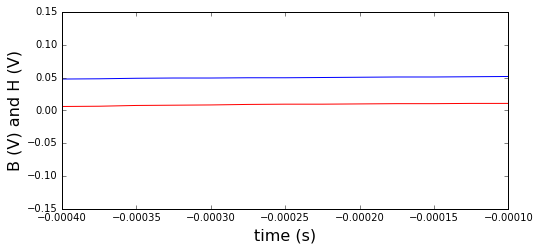

In [10]:

# Iron:
n1=460         # change this in your experiment
delta = 333    # change this in your experiment

# n1=275         # change this in your experiment
# delta = 105    # change this in your experiment

n2 = n1+delta
n3 = n2+delta
def plotdata():
    fig = plt.figure(1, figsize=(8,12))
    p1 = fig.add_subplot(311)
    p1.plot(t, B, 'r', t, H,'b')
    p1.plot(t[n1],H[n1],'ro')
    p1.plot(t[n2],H[n2],'ro')
    p1.plot(t[n3],H[n3],'ro')
    p1.set_xlabel('time (s)', fontsize = 16)
    p1.set_ylabel('B (V) and H (V)', fontsize = 16)
#     p1.set_ylim([0.5, 0.65])
    p1.set_xlim([-0.0004, -0.0001])
    plt.show()
plotdata()

Printing out these values allows the max/min to be located. Check that the max/min is centered in this range

In [11]:
for r in range(-5,+5):
    print((H[n1+r],H[n2+r],H[n3+r]))

(0.10273, -0.10391, 0.10313)
(0.10273, -0.10352, 0.10273)
(0.10273, -0.10391, 0.10273)
(0.10273, -0.10352, 0.10273)
(0.10273, -0.10313, 0.10313)
(0.10313, -0.10273, 0.10273)
(0.10273, -0.10273, 0.10313)
(0.10273, -0.10234, 0.10273)
(0.10234, -0.10273, 0.10313)
(0.10273, -0.10273, 0.10273)


These values are chosen to shift all B and H values into the positive quadrant.

In [12]:
Bshift=0.4
Hshift=0.5
t_top = t[n1:n2]
B_top = B[n1:n2]+Bshift
H_top = H[n1:n2]+Hshift
t_bot = t[n2:n3]
B_bot = B[n2:n3]+Bshift
H_bot = H[n2:n3]+Hshift

Create a figure and plot the B-H data

In [13]:
def plotbhcurve():
    fig = plt.figure(1, figsize=(8,12))
    p2 = fig.add_subplot(312)
    p2.plot(H_bot, B_bot, 'r',H_top, B_top, 'b')
    p2.set_xlabel('H (V)', fontsize = 16)
    p2.set_ylabel('B (V)', fontsize = 16)
#     p2.set_ylim(-0.4+Bshift, 0.4+Bshift)
#     p2.set_xlim(-0.5+Hshift, 0.5+Hshift)
    plt.show()

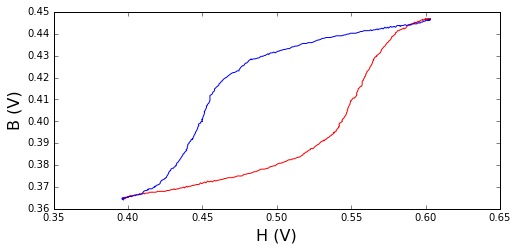

In [14]:
plotbhcurve()

Calculate the area enclosed by the B-H curve. Note that the Excel file contains voltages. To calculate B and H you have to multiply B and H by the calibration factors. 

In [54]:
def calculatearea():
    max = len(t_bot)
    area_top=0
    area_bot=0
    for r in range(0,max-1):
        area_bot+=0.5*abs(B_bot[r]+B_bot[r+1])*abs(H_bot[r+1]-H_bot[r])
        area_top+=0.5*abs(B_top[r]+B_top[r+1])*abs(H_top[r+1]-H_top[r])
    print('Area =',abs(area_bot-area_top))
    return (abs(area_bot-area_top))

In [55]:
area = calculatearea()

Area = 0.00407201020615


In [ ]:
a = arange(0,10)
a